In [1]:
# Import libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import os
import numpy as np
from scipy.stats import linregress


In [2]:
# Mt. Sinai data location
file_dir = '/data/Ali/RadDBS-QSM/src/csv'

In [3]:
# Load patient data
os.chdir(file_dir)
df = pd.read_csv('QSM anonymus- 6.22.2023-1528.csv')

In [4]:
# Display original dataframe
df

,Unnamed: 0,PRE-OP,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,POST-OP (6 MONTHS),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CORNELL ID,Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
1,67,na,13,60,41,3/9/2020,500,500,31,29,NaN,NaN,na,na
2,only Ct data,na,na,43,12,na,2304,819,na,20,18,NaN,na,na
3,74,na,na,34,11,2/10/2020,1200,600,na,17,na,NaN,na,na
4,84,na,22,53,13,6/1/2020,350,150,na,34,na,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,52,NaN,NaN,58,27,NaN,1804,1804,19,12,NaN,NaN,NaN,NaN
88,53,NaN,NaN,77,47,NaN,575,250,NaN,19,26,NaN,NaN,NaN
89,54,NaN,NaN,63,36,NaN,1400,400,8,NaN,NaN,NaN,NaN,NaN
90,55,NaN,NaN,40,29,NaN,400,450,NaN,13,NaN,37,NaN,NaN


In [5]:
# Make a copy
dfd = df.copy()
# Use descriptions as headers
header = dfd.iloc[0] 
dfd = dfd[1:] 
dfd.columns = header #set the header row
dfd

,CORNELL ID,Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
1,67,na,13,60,41,3/9/2020,500,500,31,29,NaN,NaN,na,na
2,only Ct data,na,na,43,12,na,2304,819,na,20,18,NaN,na,na
3,74,na,na,34,11,2/10/2020,1200,600,na,17,na,NaN,na,na
4,84,na,22,53,13,6/1/2020,350,150,na,34,na,NaN,na,na
5,75,na,na,62,8,2/24/2020,0,0,2,na,NaN,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,52,NaN,NaN,58,27,NaN,1804,1804,19,12,NaN,NaN,NaN,NaN
88,53,NaN,NaN,77,47,NaN,575,250,NaN,19,26,NaN,NaN,NaN
89,54,NaN,NaN,63,36,NaN,1400,400,8,NaN,NaN,NaN,NaN,NaN
90,55,NaN,NaN,40,29,NaN,400,450,NaN,13,NaN,37,NaN,NaN


In [6]:
# Make a copy for motor symptoms
motor_df = dfd.copy()
motor_df = motor_df.replace('na',np.NaN)
motor_df = motor_df.replace('only Ct data ',9)
motor_df = motor_df.replace('DELETE THIS PATIENT- NO SURGERY??',np.NaN)
motor_df = motor_df.replace('DELETE?? not bilateral// only left dbs lead',np.NaN)

# Drop non-motor (III) columns
for (columnName, columnData) in dfd.iteritems():
    if 'CORNELL ID' in columnName:
        next
    elif 'OFF (pre-dbs updrs)' in columnName:
        next
    elif 'ON (pre-dbs updrs)' in columnName:
        next
    elif 'OFF meds ON stim 6mo' in columnName:
        next
    elif 'off stim on med 6mo' in columnName:
        next
    elif 'off stim off med 6mo' in columnName:
        next
    elif 'ON meds ON stim 6mo' in columnName:
        next
    elif 'pre op levadopa equivalent dose (mg)' in columnName:
        next
    elif '6 mo levadopa equivalent dose (mg)' in columnName:
        next
    else:
        motor_df.drop(columnName,axis=1,inplace=True)

In [7]:
motor_df

,CORNELL ID,OFF (pre-dbs updrs),ON (pre-dbs updrs),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo
1,67,60,41,500,500,31,29,NaN,NaN
2,9,43,12,2304,819,NaN,20,18,NaN
3,74,34,11,1200,600,NaN,17,NaN,NaN
4,84,53,13,350,150,NaN,34,NaN,NaN
5,75,62,8,0,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
87,52,58,27,1804,1804,19,12,NaN,NaN
88,53,77,47,575,250,NaN,19,26,NaN
89,54,63,36,1400,400,8,NaN,NaN,NaN
90,55,40,29,400,450,NaN,13,NaN,37


In [8]:
# Convert columns to numerical arrays
df_post_dbs_on_meds_on_stim = motor_df['ON meds ON stim 6mo'].to_numpy().astype('float')
POST_both = df_post_dbs_on_meds_on_stim

df_post_dbs_off_meds_on_stim = motor_df['OFF meds ON stim 6mo'].to_numpy().astype('float')
POST_stim = df_post_dbs_off_meds_on_stim

df_post_dbs_on_meds_off_stim = motor_df['off stim on med 6mo'].to_numpy().astype('float')
POST_meds = df_post_dbs_on_meds_off_stim

df_post_dbs_off_meds_off_stim = motor_df['off stim off med 6mo'].to_numpy().astype('float')
POST_off = df_post_dbs_off_meds_off_stim

df_pre_dbs_off_meds = motor_df['OFF (pre-dbs updrs)'].to_numpy().astype('float')
PRE_off = df_pre_dbs_off_meds

df_pre_dbs_on_meds = motor_df['ON (pre-dbs updrs)'].to_numpy().astype('float')
PRE_med = df_pre_dbs_on_meds

In [9]:
# Find numerical entries only
cases_1a = np.where(~np.isnan(PRE_off+PRE_med+POST_both))

In [10]:
np.random.shuffle(PRE_off[cases_1a])

In [11]:
fs = 36

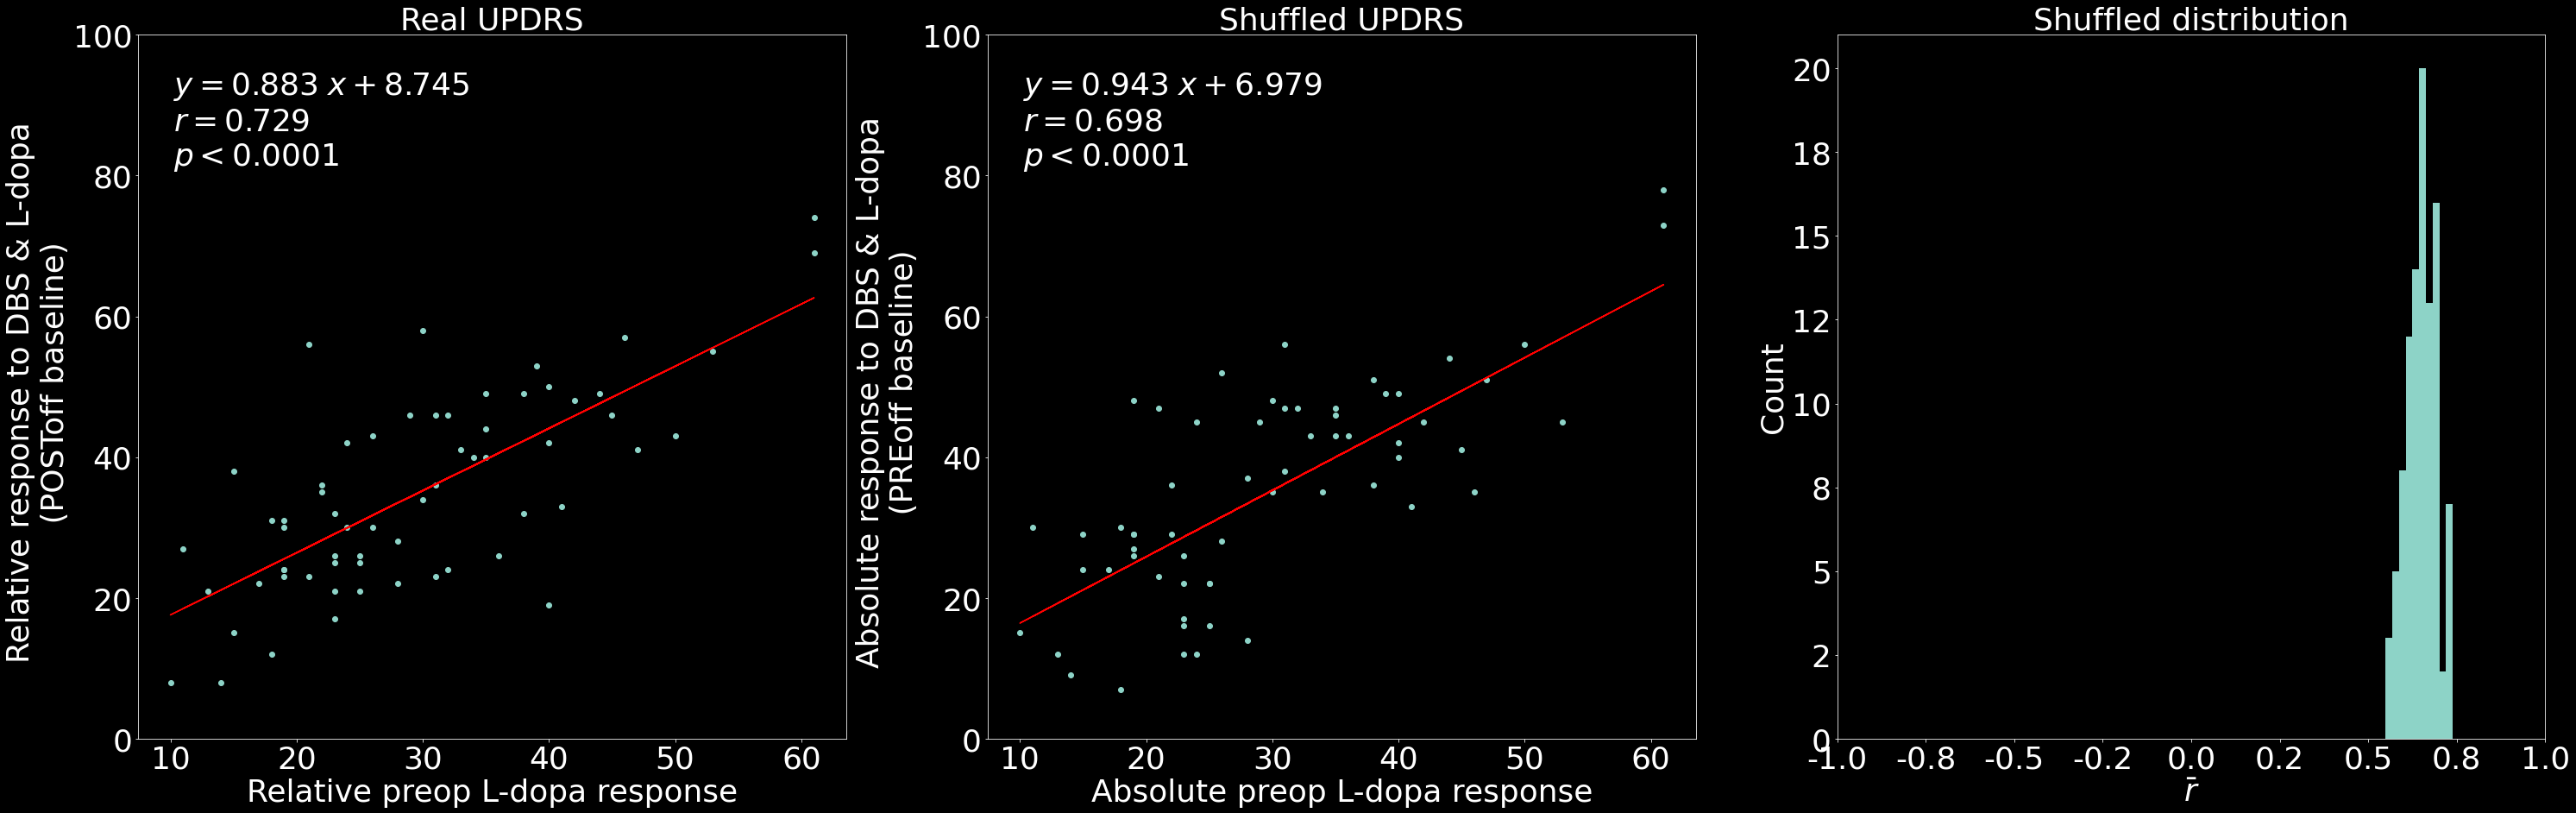

In [58]:
# Plot the data and fit like Zaidel et. al Figure 1A
x = (PRE_off[cases_1a]-PRE_med[cases_1a])
y = (PRE_off[cases_1a]-POST_both[cases_1a])
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,3,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10);
ax1.set_xlabel('Absolute preop L-dopa response',fontsize=fs);
ax1.set_ylabel('Absolute response to DBS & L-dopa \n (PREoff baseline)',fontsize=fs)
ax1.set_xlabel('Relative preop L-dopa response',fontsize=fs)
ax1.set_ylabel('Relative response to DBS & L-dopa \n (POSToff baseline)',fontsize=fs)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_title('Real UPDRS',fontsize=fs)
ax1.set_ylim(0,100)

# Plot the data and fit like Zaidel et. al Figure 1B
ys = POST_both[cases_1a]
np.random.shuffle(ys)
x = (PRE_off[cases_1a]-PRE_med[cases_1a])
y = (PRE_off[cases_1a]-ys)
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,3,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (50,15)
ax2.set_xlabel('Absolute preop L-dopa response',fontsize=fs)
ax2.set_ylabel('Absolute response to DBS & L-dopa \n (PREoff baseline)',fontsize=fs)
ax2.set_title('Shuffled UPDRS',fontsize=fs)
ax2.set_ylim(0,100)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Shuffle and generate distribution like Zaidel et. al Figure 1C
ax3 = plt.subplot(1,3,3)
Rs = []
for j in np.arange(100):
     ys = POST_both[cases_1a]
     np.random.shuffle(ys)
     x = (PRE_off[cases_1a]-PRE_med[cases_1a])
     y = (PRE_off[cases_1a]-ys)
     lr_rho_med = linregress(x,y)
     Rs.append(lr_rho_med.rvalue)

[counts, bins] = np.histogram(np.asarray(Rs))
ax3.hist(bins[:-1], bins, weights=counts)
ax3.set_xlabel(r"$\bar{r}$",fontsize=fs)
ax3.set_ylabel('Count',fontsize=fs)
ax3.set_title('Shuffled distribution',fontsize=fs)
ax3.set_xlim(-1,1)
ax3.set_xticklabels(x,fontsize=fs)
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax3.set_yticklabels(y,fontsize=fs)
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.style.use('dark_background')
plt.show;

In [13]:
[counts, bins] = np.histogram(np.asarray(Rs))

In [14]:
bins

array([0.55979529, 0.5781294 , 0.59646351, 0.61479761, 0.63313172,
       0.65146583, 0.66979993, 0.68813404, 0.70646815, 0.72480225,
       0.74313636])

In [15]:
counts

array([ 1,  2,  7, 12, 31, 17, 17,  3,  3,  7])

In [16]:
# Find numerical entries only
cases_1d = np.where(~np.isnan(PRE_off+PRE_med+POST_both+POST_off))

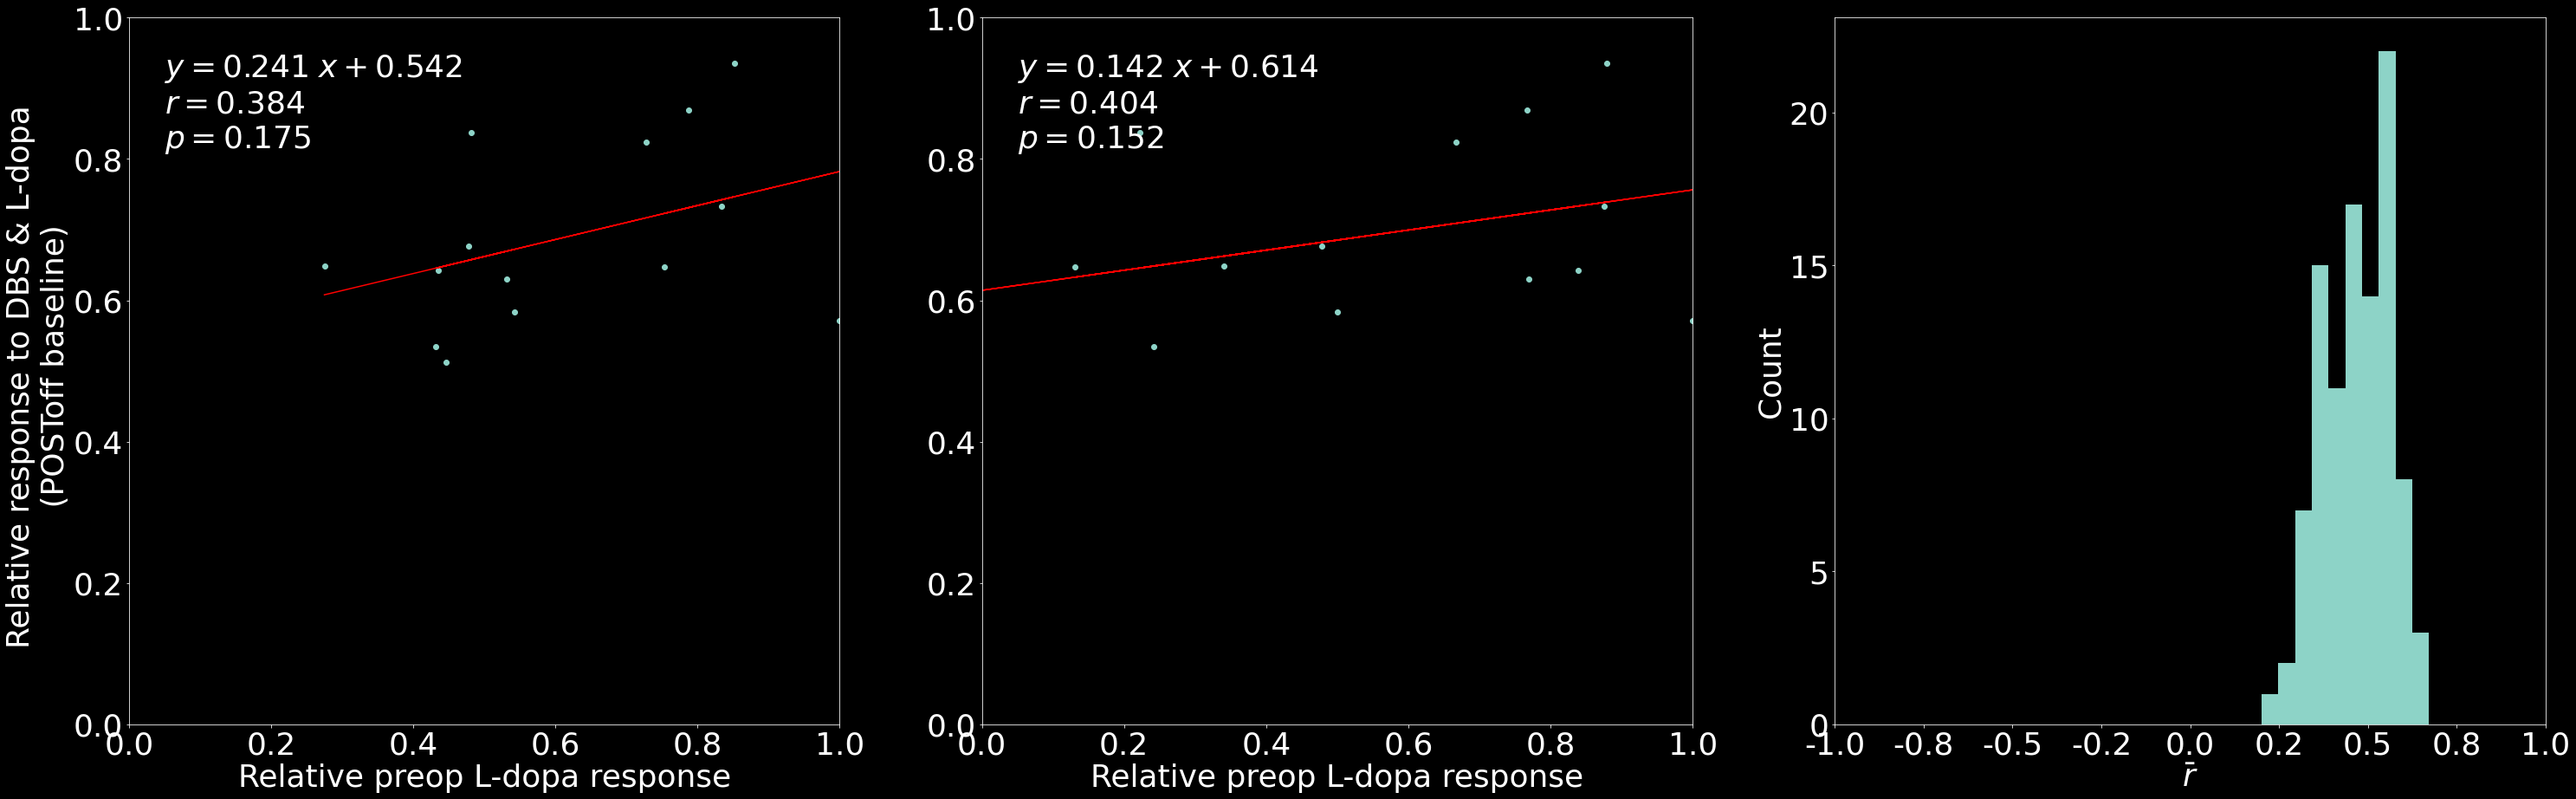

In [53]:
# Plot the data and fit like Zaidel et. al Figure 1D
x = (PRE_off[cases_1d]-PRE_med[cases_1d])/PRE_off[cases_1d]
y = (POST_off[cases_1d]-POST_both[cases_1d])/POST_off[cases_1d]
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,3,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
ax1.set_xlabel('Relative preop L-dopa response',fontsize=fs)
ax1.set_ylabel('Relative response to DBS & L-dopa \n (POSToff baseline)',fontsize=fs)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax1.set_title('Real UPDRS',fontsize=fs)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

# Plot the data and fit like Zaidel et. al Figure 1B
xs = PRE_off[cases_1d]
np.random.shuffle(xs)
x = (xs-PRE_med[cases_1d])/xs
y = (POST_off[cases_1d]-POST_both[cases_1d])/POST_off[cases_1d]
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,3,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (50,15)
ax2.set_xlabel('Relative preop L-dopa response',fontsize=fs)
#ax2.set_ylabel('Relative response to DBS & L-dopa \n (PREoff baseline)',fontsize=fs)
#ax2.set_title('Shuffled UPDRS',fontsize=fs)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Shuffle and generate distribution like Zaidel et. al Figure 1C
ax3 = plt.subplot(1,3,3)
Rs = []
for j in np.arange(100):
     xs = PRE_off[cases_1d]
     np.random.shuffle(xs)
     x = (xs-PRE_med[cases_1d])/xs
     y = (POST_off[cases_1d]-POST_both[cases_1d])/POST_off[cases_1d]
     lr_rho_med = linregress(x,y)
     Rs.append(lr_rho_med.rvalue)

[counts, bins] = np.histogram(np.asarray(Rs))
ax3.hist(bins[:-1], bins, weights=counts)
ax3.set_xlabel(r"$\bar{r}$",fontsize=fs)
ax3.set_ylabel('Count',fontsize=fs)
#ax3.set_title('Shuffled distribution',fontsize=fs)
ax3.set_xlim(-1,1)
ax3.set_xticklabels(x,fontsize=fs)
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax3.set_yticklabels(y,fontsize=fs)
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.style.use('dark_background')
plt.show;

plt.style.use('dark_background')
plt.show;

In [18]:
# Find numerical entries only
cases_2a = np.where(~np.isnan(PRE_off+PRE_med))

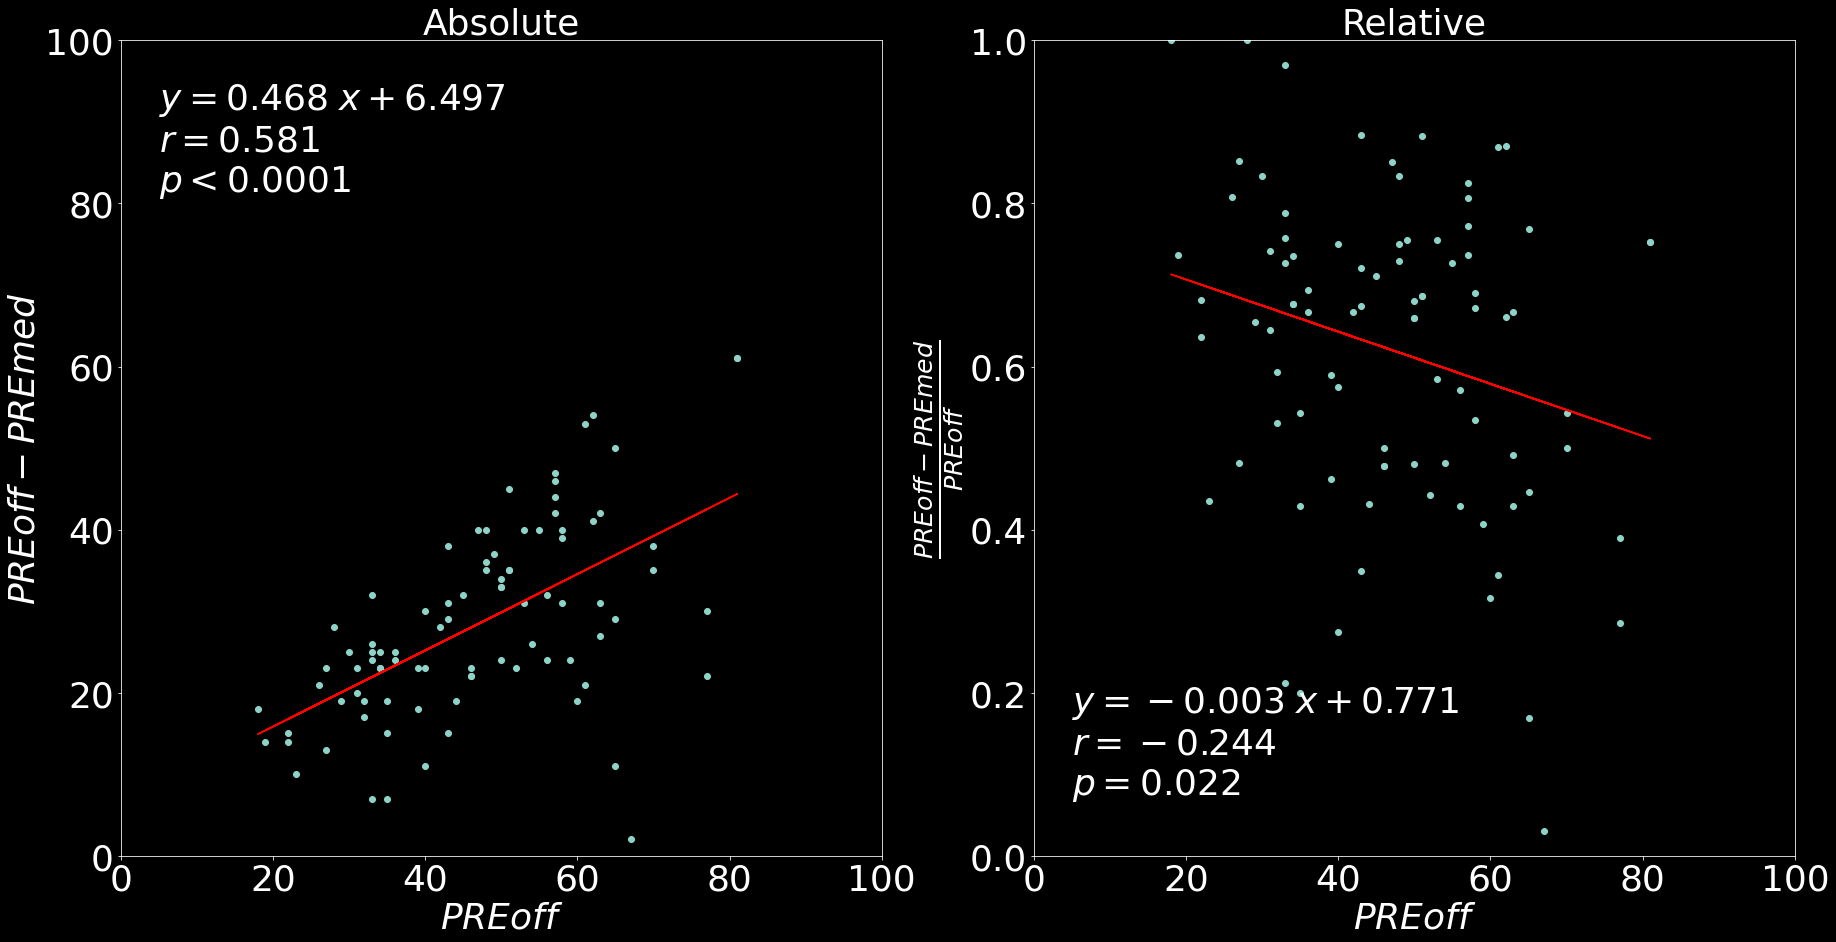

In [68]:
# Plot the data and fit like Zaidel et. al Figure 2A
x = (PRE_off[cases_2a])
y = (PRE_off[cases_2a]-PRE_med[cases_2a])
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
ax1.set_ylabel(r"${PREoff-PREmed}$",fontsize=fs)
ax1.set_xlabel(r"${PREoff}$",fontsize=fs)
ax1.set_ylim(0,100)
ax1.set_xlim(0,100)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_title('Absolute',fontsize=fs)

x = (PRE_off[cases_2a])
y = (PRE_off[cases_2a]-PRE_med[cases_2a])/PRE_off[cases_2a]
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.21, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax2.set_ylabel(r"$\frac{PREoff-PREmed}{PREoff}$",fontsize=fs)
ax2.set_xlabel(r"${PREoff}$",fontsize=fs)
ax2.set_ylim(0,1)
ax2.set_xlim(0,100)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_title('Relative',fontsize=fs)


plt.style.use('dark_background')
plt.show;

In [20]:
# Find numerical entries only
cases_2c = np.where(~np.isnan(POST_off+POST_stim))

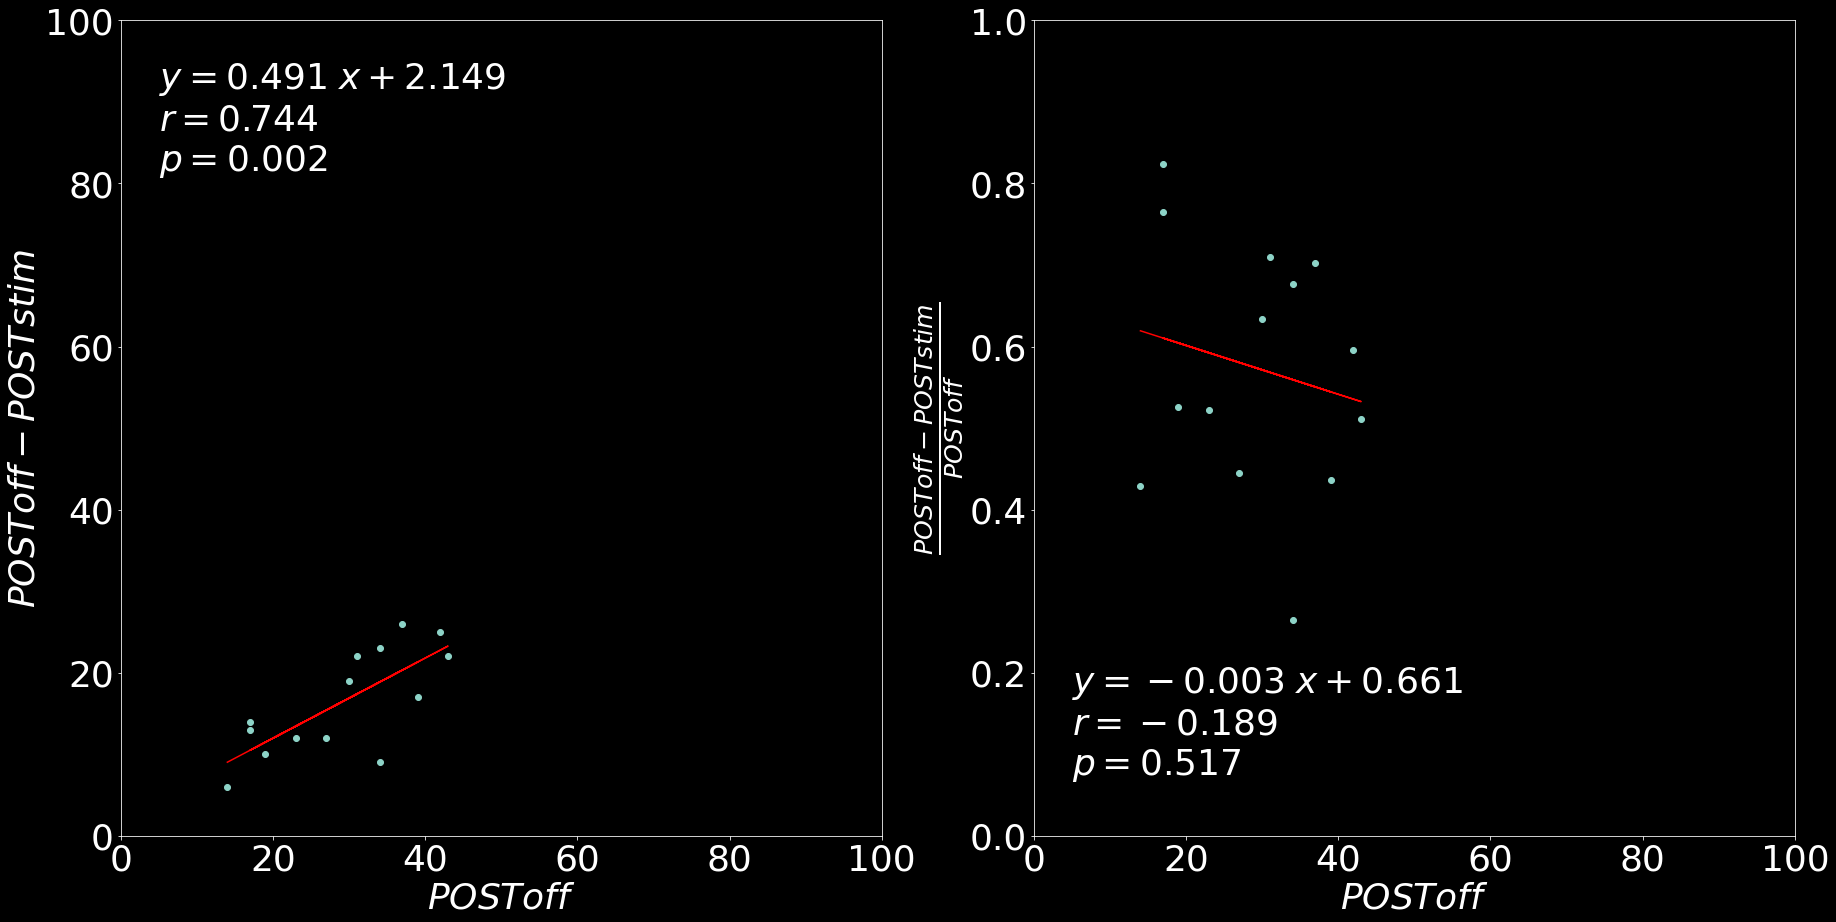

In [70]:
# Plot the data and fit like Zaidel et. al Figure 2C
x = (POST_off[cases_2c])
y = (POST_off[cases_2c]-POST_stim[cases_2c])
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
ax1.set_ylabel(r"${POSToff-POSTstim}$",fontsize=fs)
ax1.set_xlabel(r"${POSToff}$",fontsize=fs)
ax1.set_ylim(0,100)
ax1.set_xlim(0,100)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax1.set_title('Absolute',fontsize=fs)

x = (POST_off[cases_2c])
y = (POST_off[cases_2c]-POST_stim[cases_2c])/POST_off[cases_2c]
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.21, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax2.set_ylabel(r"$\frac{POSToff-POSTstim}{POSToff}$",fontsize=fs)
ax2.set_xlabel(r"${POSToff}$",fontsize=fs)
ax2.set_xlim(0,100)
ax2.set_ylim(0,1)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax2.set_title('Relative',fontsize=fs)



plt.style.use('dark_background')
plt.show;

In [22]:
# Find numerical entries only
cases_2e = np.where(~np.isnan(POST_off+POST_both))

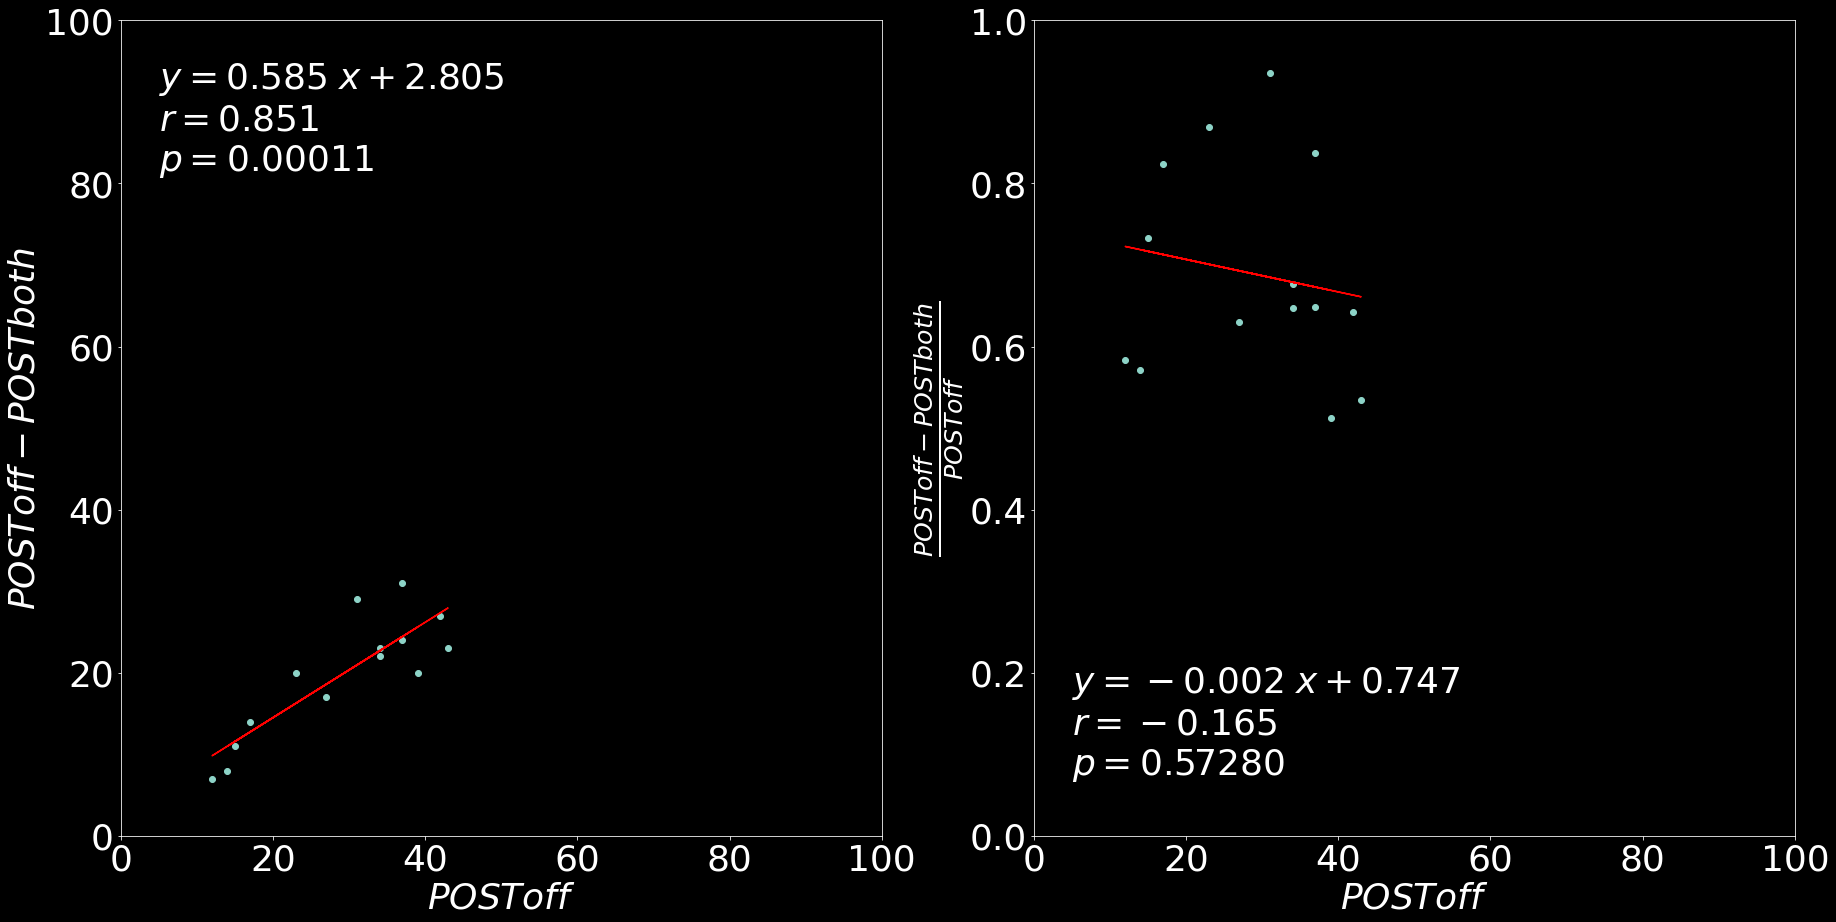

In [78]:
# Plot the data and fit like Zaidel et. al Figure 2C
x = (POST_off[cases_2e])
y = (POST_off[cases_2e]-POST_both[cases_2e])
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
     
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
ax1.set_ylabel(r"${POSToff-POSTboth}$",fontsize=fs)
ax1.set_xlabel(r"${POSToff}$",fontsize=fs)
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax1.set_title('Absolute',fontsize=fs)

x = (POST_off[cases_2e])
y = (POST_off[cases_2e]-POST_both[cases_2e])/POST_off[cases_2e]
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
plt.gca().text(0.05, 0.21, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax2.set_ylabel(r"$\frac{POSToff-POSTboth}{POSToff}$",fontsize=fs)
ax2.set_xlabel(r"${POSToff}$",fontsize=fs)
ax2.set_xlim(0,100)
ax2.set_ylim(0,1)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax2.set_title('Relative',fontsize=fs)


plt.style.use('dark_background')
plt.show;

In [88]:
# Find numerical entries only
cases_3a = np.where(~np.isnan(PRE_off+POST_stim+PRE_med+POST_both))

Text(0.5, 1.0, 'UPDRS-III reduction from DBS + medication')

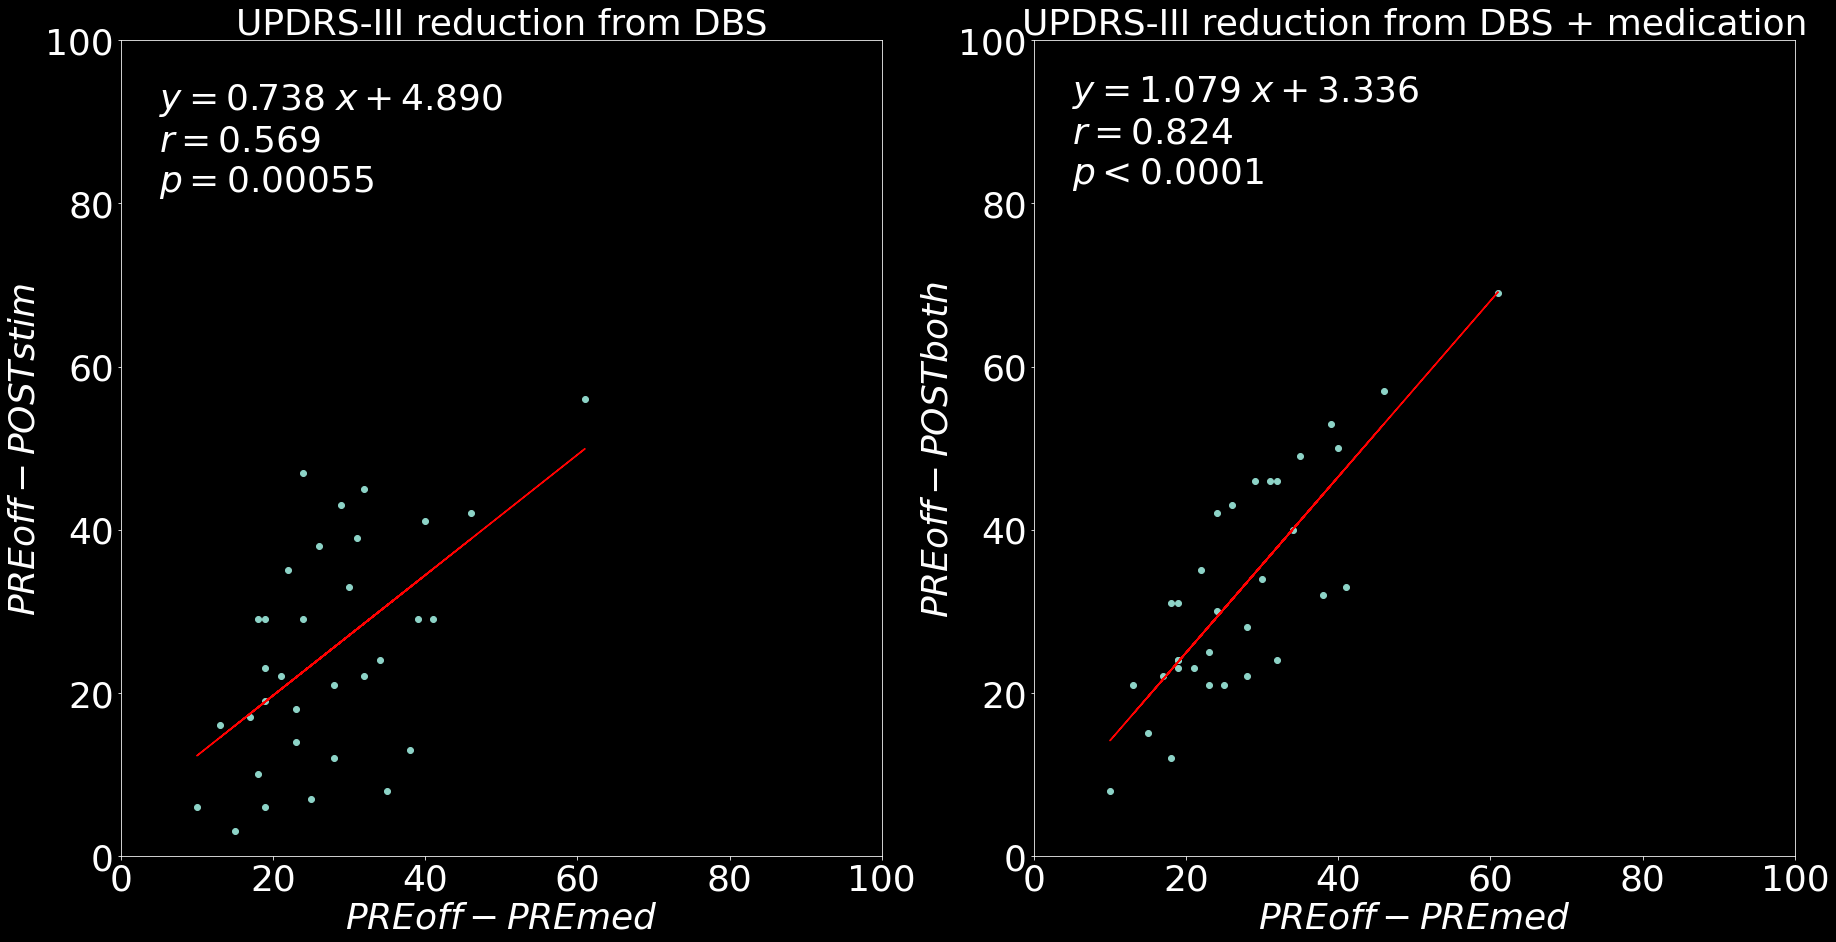

In [137]:
# Plot the data and fit like Zaidel et. al Figure 3A+B
x = PRE_off[cases_3a]-PRE_med[cases_3a]
y = PRE_off[cases_3a]-POST_stim[cases_3a]
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax1.set_xlabel(r"${PREoff-PREmed}$",fontsize=fs)
ax1.set_ylabel(r"${PREoff-POSTstim}$",fontsize=fs)
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.set_title('UPDRS-III reduction from DBS',fontsize=fs)
# Plot the data and fit like Zaidel et. al Figure 2C
x = PRE_off[cases_3a]-PRE_med[cases_3a]
y = PRE_off[cases_3a]-POST_both[cases_3a]
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.96, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax2.set_xlabel(r"${PREoff-PREmed}$",fontsize=fs)
ax2.set_ylabel(r"${PREoff-POSTboth}$",fontsize=fs)
ax2.set_xlim(0,100)
ax2.set_ylim(0,100)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_title('UPDRS-III reduction from DBS + medication',fontsize=fs)
     
     

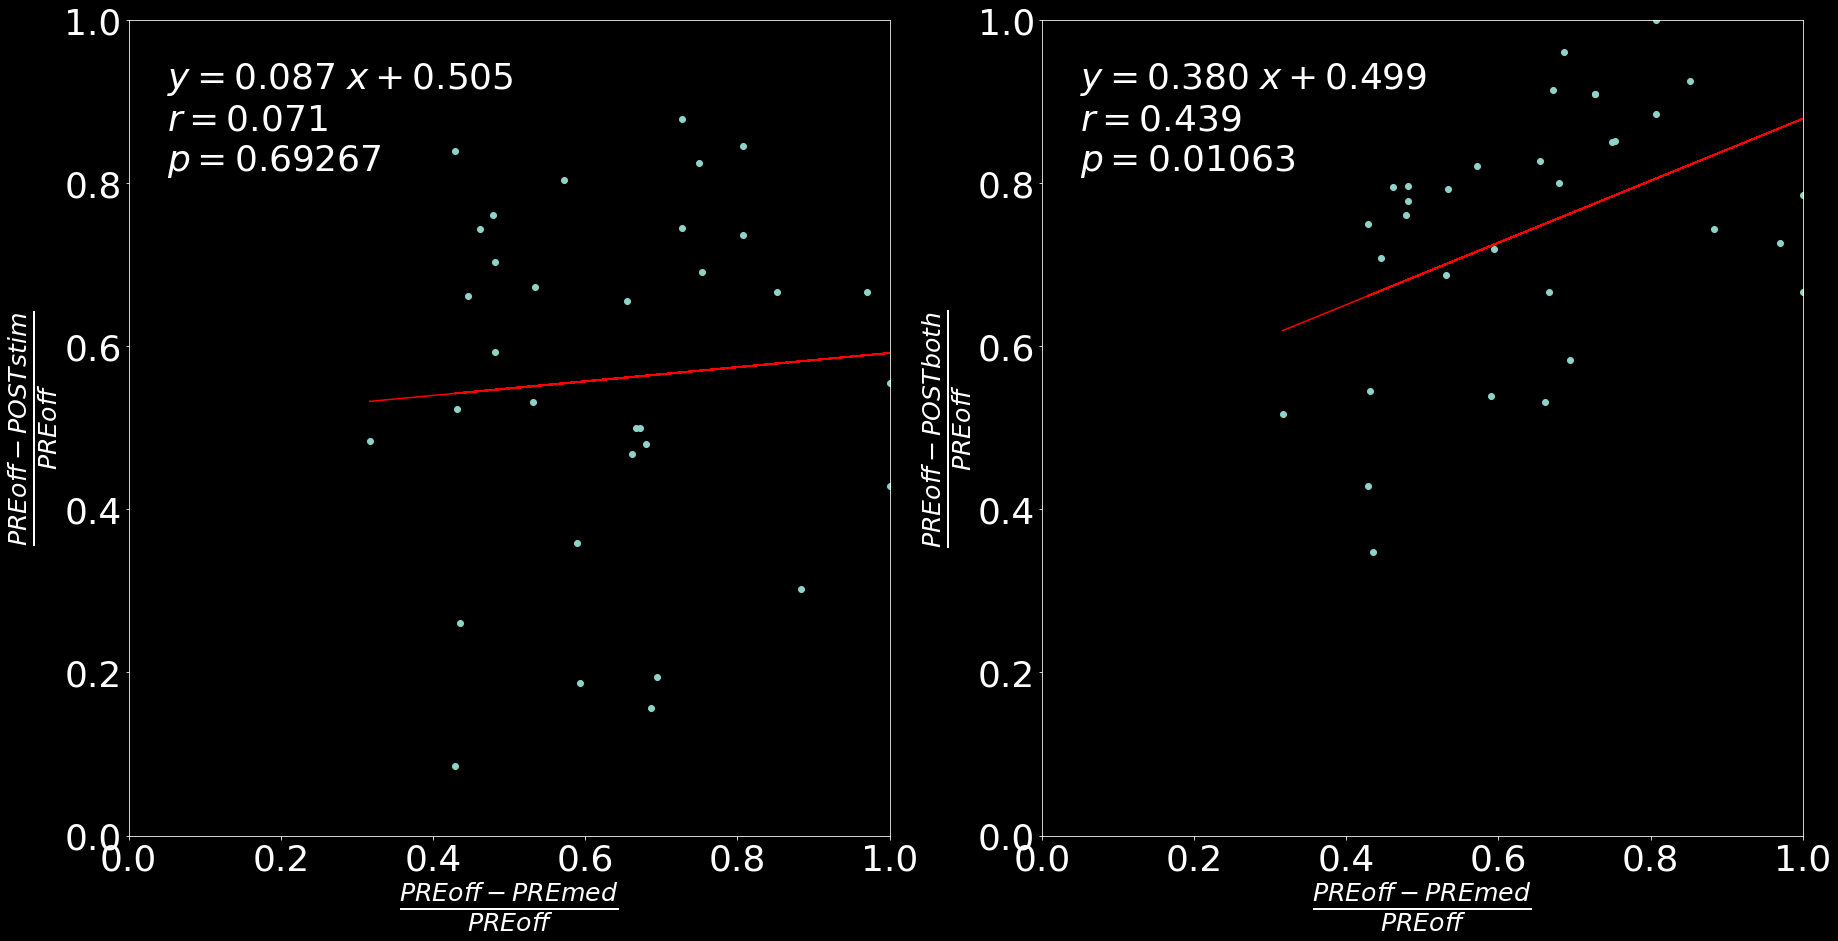

In [143]:
# Plot the data and fit like Zaidel et. al Figure 3C+D
# cases_3a = cases_3d
x = (PRE_off[cases_3a]-PRE_med[cases_3a])/PRE_off[cases_3a]
y = (PRE_off[cases_3a]-POST_stim[cases_3a])/PRE_off[cases_3a]
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax1.set_xlabel(r"$\frac{PREoff-PREmed}{PREoff}$",fontsize=fs)
ax1.set_ylabel(r"$\frac{PREoff-POSTstim}{PREoff}$",fontsize=fs)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax1.set_title('UPDRS-III reduction from DBS',fontsize=fs)
# Plot the data and fit like Zaidel et. al Figure 2C
x = (PRE_off[cases_3a]-PRE_med[cases_3a])/PRE_off[cases_3a]
y = (PRE_off[cases_3a]-POST_both[cases_3a])/PRE_off[cases_3a]
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax2.set_xlabel(r"$\frac{PREoff-PREmed}{PREoff}$",fontsize=fs)
ax2.set_ylabel(r"$\frac{PREoff-POSTboth}{PREoff}$",fontsize=fs)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax2.set_title('UPDRS-III reduction from DBS + medication',fontsize=fs)
     
     

In [123]:
# Find numerical entries only
cases_3e = np.where(~np.isnan(PRE_off+POST_off+POST_stim+PRE_med+POST_both))

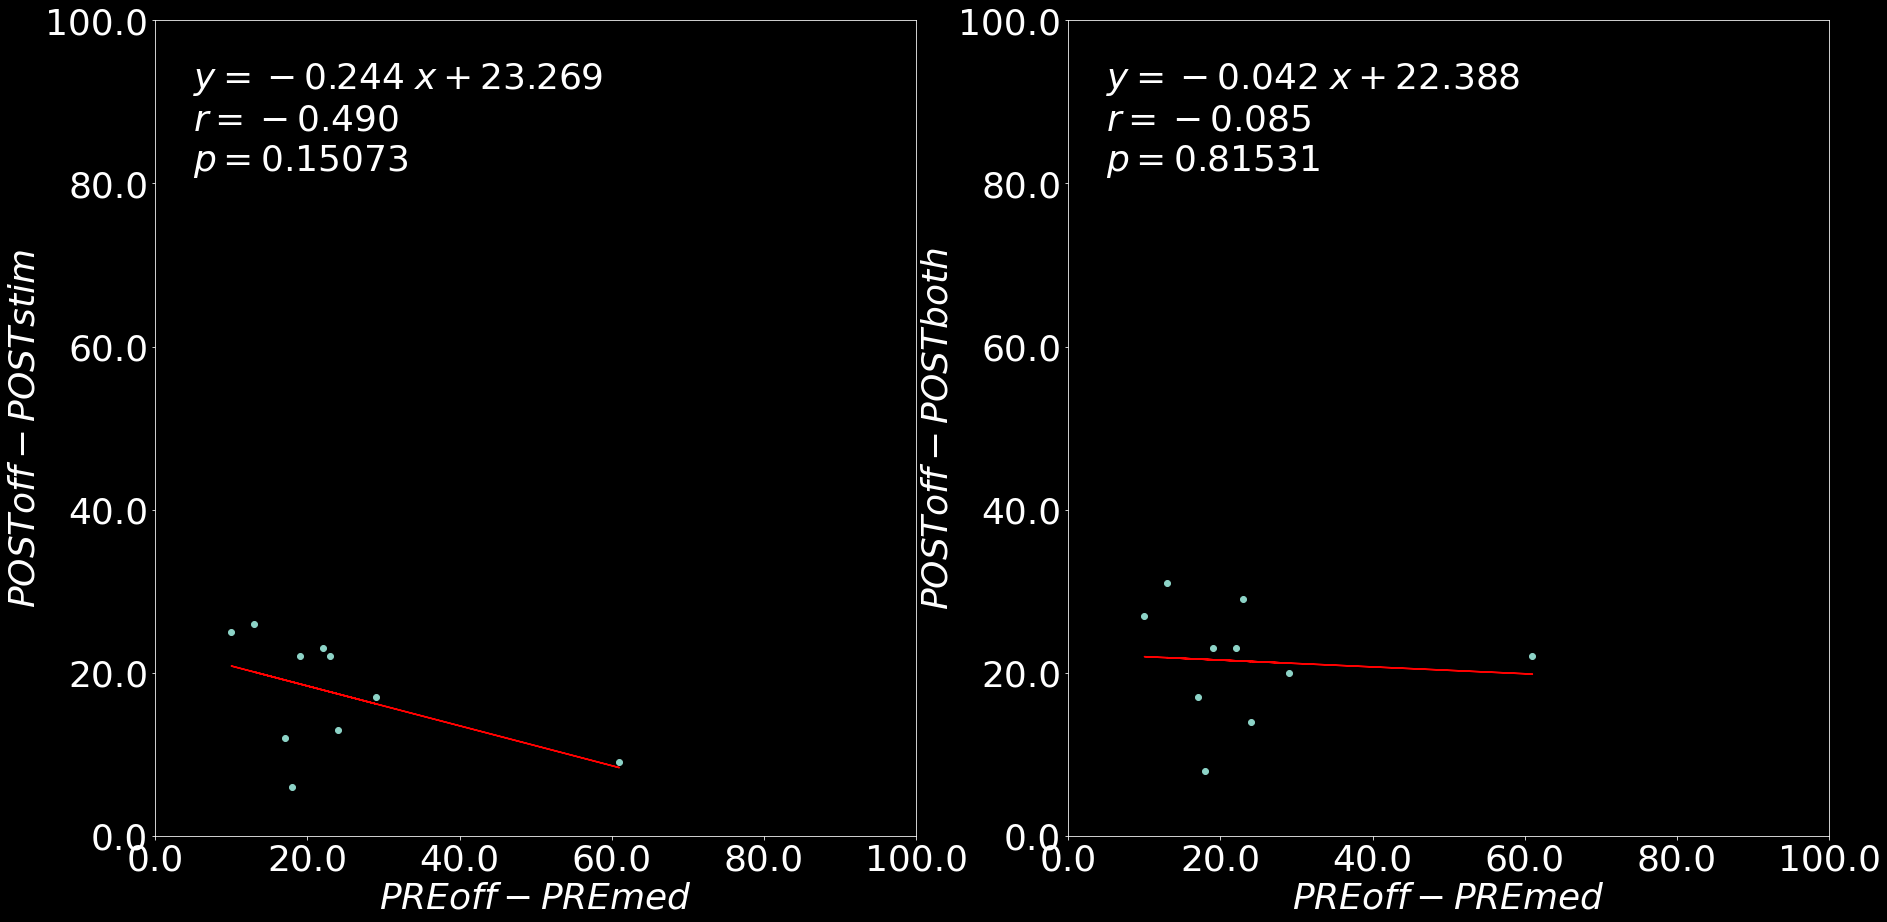

In [144]:
# Plot the data and fit like Zaidel et. al Figure 3E+F
x = (PRE_off[cases_3e]-PRE_med[cases_3e])
y = (POST_off[cases_3e]-POST_stim[cases_3e])
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax1.set_ylabel(r"${POSToff-POSTstim}$",fontsize=fs)
ax1.set_xlabel(r"${PREoff-PREmed}$",fontsize=fs)
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax1.set_title('UPDRS-III reduction from DBS',fontsize=fs)
# Plot the data and fit like Zaidel et. al Figure 2C
x = (PRE_off[cases_3e]-PRE_med[cases_3e])
y = (POST_off[cases_3e]-POST_both[cases_3e])
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax2.set_ylabel(r"${POSToff-POSTboth}$",fontsize=fs)
ax2.set_xlabel(r"${PREoff-PREmed}$",fontsize=fs)
ax2.set_xlim(0,100)
ax2.set_ylim(0,100)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax2.set_title('UPDRS-III reduction from DBS + medication',fontsize=fs)
     
     

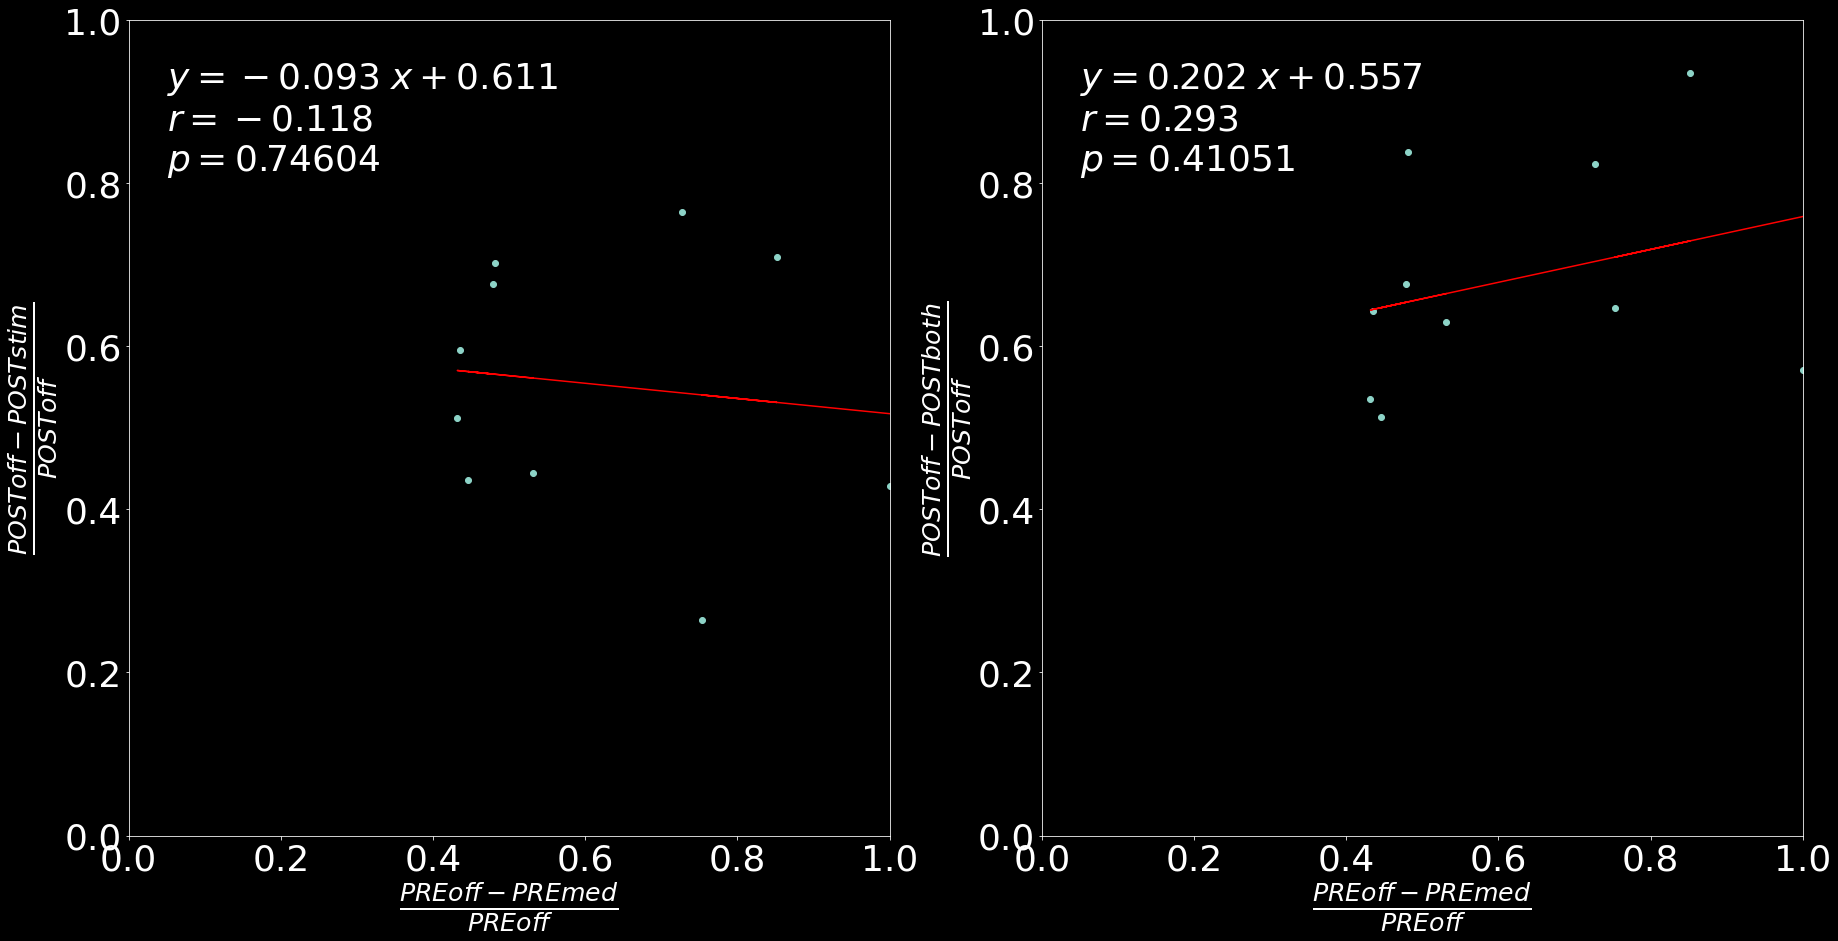

In [149]:
# Plot the data and fit like Zaidel et. al Figure 3E+F
# cases_3e = cases_3g
x = (PRE_off[cases_3e]-PRE_med[cases_3e])/PRE_off[cases_3e]
y = (POST_off[cases_3e]-POST_stim[cases_3e])/POST_off[cases_3e]
lr_rho_med = linregress(x,y)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y)
ax1.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax1.set_ylabel(r"$\frac{POSToff-POSTstim}{POSToff}$",fontsize=fs)
ax1.set_xlabel(r"$\frac{PREoff-PREmed}{PREoff}$",fontsize=fs)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_xticklabels(x,fontsize=fs)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_yticklabels(y,fontsize=fs)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax1.set_title('UPDRS-III reduction from DBS',fontsize=fs)
# Plot the data and fit like Zaidel et. al Figure 2C
x = (PRE_off[cases_3e]-PRE_med[cases_3e])/PRE_off[cases_3e]
y = (POST_off[cases_3e]-POST_both[cases_3e])/POST_off[cases_3e]
lr_rho_med = linregress(x,y)
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,y)
ax2.plot(x,x*lr_rho_med.slope+lr_rho_med.intercept,'-r')
if lr_rho_med.pvalue < 0.0001:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p < 0.0001$"
else:
     text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.5f}$"
      
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=fs, verticalalignment='top')
plt.rcParams["figure.figsize"] = (30,15)
ax2.set_ylabel(r"$\frac{POSToff-POSTboth}{POSToff}$",fontsize=fs)
ax2.set_xlabel(r"$\frac{PREoff-PREmed}{PREoff}$",fontsize=fs)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_xticklabels(x,fontsize=fs)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_yticklabels(y,fontsize=fs)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax2.set_title('UPDRS-III reduction from DBS + medication',fontsize=fs)
     
     

<b>References</b>
$$$$
A. Zaidel, H. Bergman, Y. Ritovand Z. I. Md, “Levodopa and subthalamic deep brain stimulation responses are not congruent”, Movement Disorders, vol. 25, no. 14, pp. 2379–2386, 2010, doi: 10.1002/mds.23294. 
$$$$
W. Zhao, “Relationship Between Iron Distribution in Deep Gray Matter Nuclei Measured by Quantitative Susceptibility Mapping and Motor Outcome After Deep Brain Stimulation in Patients With Parkinson's Disease”, Journal of Magnetic Resonance Imaging, 2023, doi: 10.1002/jmri.28574.
$$$$
Liu Y, Xiao B, Zhang C, et al. Predicting Motor Outcome of Subthalamic Nucleus Deep Brain Stimulation for Parkinson's Disease Using Quantitative Susceptibility Mapping and Radiomics: A Pilot Study. Front Neurosci. 2021;15:731109. Published 2021 Sep 7. doi:10.3389/fnins.2021.731109
$$$$
Lin Z, Zhang X, Wang L, Zhang Y, Zhou H, Sun Q, Sun B, Huang P, Li D. Revisiting the L-Dopa Response as a Predictor of Motor Outcomes After Deep Brain Stimulation in Parkinson's Disease. Front Hum Neurosci. 2021 Feb 4;15:604433. doi: 10.3389/fnhum.2021.604433. PMID: 3fs13209; PMCID: PMC7889513.